In [7]:
import csv
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
ROOT_DIR = 'C:/Users/utilisateur/Documents/GitHub/plate-detector/'

GEN_IMGS_DIR = ROOT_DIR +'data/GENERATED_DATASET/imgs/'
GEN_ANNS_DIR = ROOT_DIR +'data/GENERATED_DATASET/anns/'

REAL_IMGS_DIR = ROOT_DIR +'data/MIXED_DATASET/imgs/'
REAL_ANNS_DIR = ROOT_DIR +'data/MIXED_DATASET/anns/'

In [10]:
def data_quality(imgs_dir) :
    print("Calcul de la moyenne, la variance et le coefficient de variation ...")
    mean = 0
    std = 0
    length = 0
    images = os.listdir(imgs_dir)
    for i, path in enumerate(images):
        sum_ = np.mean(cv2.imread(imgs_dir + path))
        length += 1
        mean_next = mean + (sum_ - mean) / length
        std += (sum_ - mean) * (sum_ - mean_next)
        mean = mean_next
    std = np.sqrt(std / (length - 1))

    print("Moyenne : {}".format(mean))
    print("Variance : {}".format(std))
    print("Coeficient de cariation : {}".format(mean/std))
    print("Terminé!")

In [11]:
# Evaluation de la qualité des données
data_quality(GEN_IMGS_DIR)

Calcul de la moyenne, la variance et le coefficient de variation ...
Moyenne : 123.67296023697945
Variance : 35.542703419454895
Coeficient de cariation : 3.479559750350475
Terminé!


In [78]:
def data_center_position(anns_dir, imgs_dir) :
    all_imgs, seen_labels = parse_annotation(anns_dir, imgs_dir)
    X = []
    Y = []
    for i in range(len(all_imgs)):
        img = cv2.imread(all_imgs[i]['file_name'])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        for j in range(1) :
            x = (all_imgs[i]['object'][j]['xmin'] + all_imgs[i]['object'][j]['xmax']) / (2 * all_imgs[i]['width'])
            y = (all_imgs[i]['object'][j]['ymin'] + all_imgs[i]['object'][j]['ymax']) / (2 * all_imgs[i]['height'])
            X += [x]
            Y += [y]
    return X, Y

def parse_annotation(anns_dir, imgs_dir):
    all_imgs = []
    seen_labels = {}
    for img_ in sorted(os.listdir(imgs_dir)):
        # Problème posé par Jupyter
        if img_ == '.ipynb_checkpoints':
            continue
        
        img = {'object' : []}
        img_name = imgs_dir + img_
        ann_name = anns_dir + img_[:-3] + 'txt'
        
        img['file_name'] = img_name
        with open(ann_name, mode = 'r') as file:
            for line in file:
                obj = {'name' : ''} # {'name' : '', 'ymin' : , 'xmin' : , 'ymax' : , 'xmax' : }
                name, ymin, xmin, ymax, xmax, height, width = line[:-1].split(',')
                obj['name'] = name
                obj['ymin'], obj['xmin'], obj['ymax'], obj['xmax'] = int(ymin), int(xmin), int(ymax), int(xmax)
                img['height'], img['width'] = int(height), int(width)
                img['object'] += [obj] # {'object' : [{'name' : 'Plaque', .. coordonnées ..} ], 'height' : , 'width' : }

                if not obj['name'] in seen_labels:
                    seen_labels[obj['name']] = 1
                else:
                    seen_labels[obj['name']] += 1
    
        all_imgs += [img]
    return all_imgs, seen_labels

In [79]:
REAL_X, REAL_Y = data_center_position(REAL_ANNS_DIR, REAL_IMGS_DIR)
GEN_X, GEN_Y = data_center_position(GEN_ANNS_DIR, GEN_IMGS_DIR)

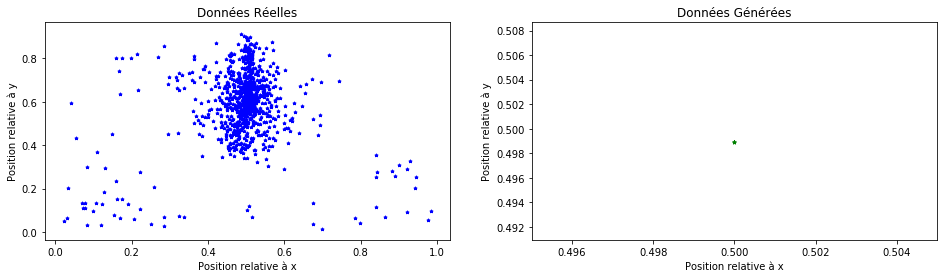

In [80]:
figure = plt.figure(figsize = (16, 4))

axes = figure.add_subplot(1, 2, 1)
axes.set_xlabel('Position relative à x')
axes.set_ylabel('Position relative à y')
axes.set_title('Données Réelles')
plt.scatter(REAL_X, REAL_Y, s=10, c='b', marker='*', label='real')
axes = figure.add_subplot(1, 2, 2)
axes.set_xlabel('Position relative à x')
axes.set_ylabel('Position relative à y')
axes.set_title('Données Générées')
plt.scatter(GEN_X, GEN_Y, s=15, c='g', marker='*', label='gen')